In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Dropbox/SimulationOutput/increasing_size/stats.sqlite')

In [3]:
q = pd.read_sql_table('stats', conn)
q.tail()

,treatment_id,replicate_id,generation,kind,value
52705,1,19,50000,C_5,1.364954
52706,1,19,50000,C_6,0.007005
52707,1,19,50000,C_7,0.001257
52708,1,19,50000,C_AVE,6.444593
52709,1,19,50000,C_MAX,3.652015


In [4]:
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)

In [5]:
q.tail()

value
treatment_id replicate_id generation kind           
1            19           50000      C_5    1.364954
                                     C_6    0.007005
                                     C_7    0.001257
                                     C_AVE  6.444593
                                     C_MAX  3.652015

In [6]:
z = pd.read_sql_query('select generation, kind, value from stats where treatment_id = 1 and replicate_id = 1', conn, index_col=['generation', 'kind'])
z.tail()

value
generation kind           
50000      C_5    0.000049
           C_6    0.000830
           C_7    0.015202
           C_AVE  3.966159
           C_MAX  3.950018

In [7]:
zz = z.unstack(-1)
zz.tail()

value                                                    \
kind              CT       C_0       C_1       C_2       C_3       C_4   
generation                                                               
49200       3.941912  3.908285  0.000000  0.000034  0.001491  0.002033   
49400       3.923069  3.879494  0.000195  0.000000  0.000011  0.003113   
49600       3.956465  3.925731  0.000000  0.000491  0.000000  0.001868   
49800       3.953556  3.939313  0.000204  0.000089  0.000000  0.002095   
50000       3.966159  3.950018  0.000000  0.000049  0.000011  0.000000   

                                                              
kind             C_5       C_6       C_7     C_AVE     C_MAX  
generation                                                    
49200       0.000000  0.014550  0.015519  3.941912  3.908285  
49400       0.002072  0.004133  0.034051  3.923069  3.879494  
49600       0.000934  0.001223  0.026218  3.956465  3.925731  
49800       0.000000  0.000329  0.011525  3.953556  3.939313  
50000       0.000049  0.000830  0.015202  3.966159  3.950018

In [8]:
zz.columns = zz.columns.levels[1]

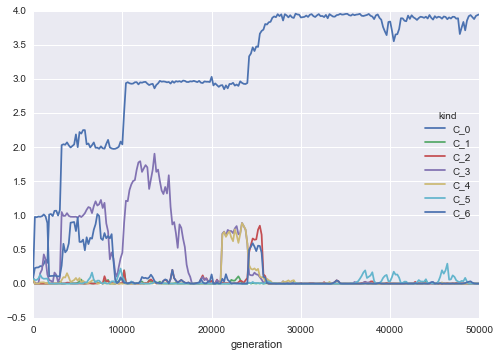

In [12]:
zz.dropna(0).plot(y=['C_%d' % i for i in range(7)])

In [28]:
finals = pd.read_sql_query('select generation, value from stats where generation in (10000,20000, 30000, 40000, 50000) and kind = "C_MAX"', conn)

In [29]:
finals.tail()

,generation,value
95,10000,0.757073
96,20000,0.599978
97,30000,1.004095
98,40000,0.912439
99,50000,0.946118


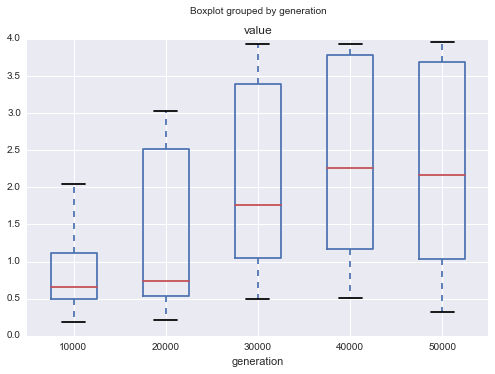

In [30]:
finals.boxplot(column='value',by='generation')